In [3]:
import pandas as pd
#we include this to use data structures and operations for manupulating neumerical tables
import numpy as np

import matplotlib.pyplot as mplot
import seaborn as sbrn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os

In [4]:
data_f=pd.read_csv('D:\SEM_5\IDS\Project\cleveland_data.csv')

In [5]:
data_f.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
data_f.replace('?',-1,inplace=True)
data_f[data_f==-1].count()

index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot: xlabel='ca'>

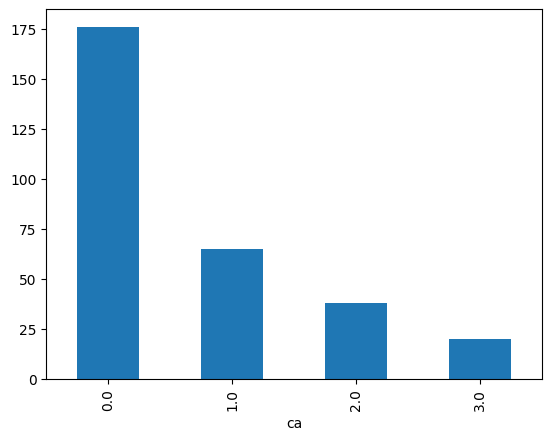

In [7]:
wca=data_f.groupby('ca')['ca'].count()
wca.plot(kind='bar')

In [9]:
mvar1=data_f.ca.mode()[0]
data_f.ca=data_f.ca.replace(-1,mvar1)
#Replacing NaN values with most frequently available values

<AxesSubplot: xlabel='thal'>

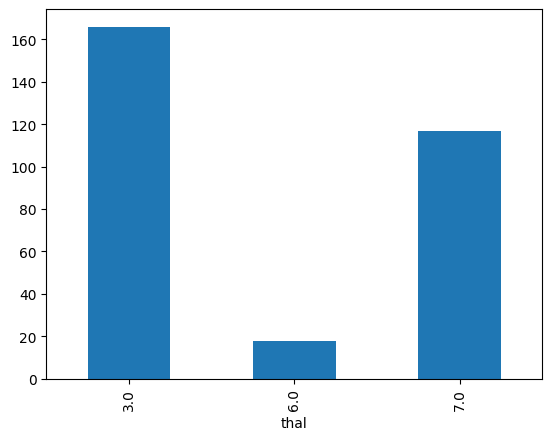

In [10]:
wthal=data_f.groupby('thal')['thal'].count()
wthal.plot(kind='bar')

In [11]:
mvar2=data_f.thal.mode()[0]
data_f.thal=data_f.thal.replace(-1,mvar2)

In [12]:
data_f.target.value_counts()
#0 represents no risk
#1,2,3,4 represent increasing order of risk
# below number shows patient belonging to each category

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

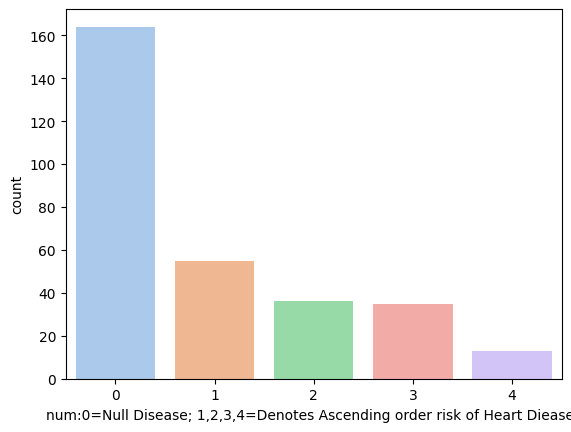

In [13]:
sbrn.countplot(x="target", data=data_f, palette="pastel")
mplot.xlabel("num:0=Null Disease; 1,2,3,4=Denotes Ascending order risk of Heart Dieases")
mplot.show()

In [14]:
count_healthy = len(data_f[data_f.target == 0])
count_unhealthy = len(data_f[data_f.target == 1])+len(data_f[data_f.target == 2])+len(data_f[data_f.target == 3])+len(data_f[data_f.target == 4])
print("Patients having no heart disease (%): {:.5f}%".format((count_healthy / (len(data_f.target))*100)))
print("patients having heart disease: {:.5f}%".format((count_unhealthy / (len(data_f.target))*100)))

Patients having no heart disease (%): 54.12541%
patients having heart disease: 45.87459%


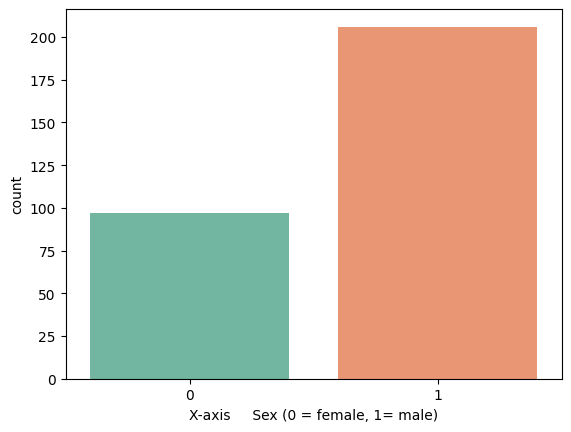

In [15]:
sbrn.countplot(x='sex', data=data_f, palette="Set2")
mplot.xlabel("X-axis     Sex (0 = female, 1= male)")
mplot.show()

In [16]:
No_of_female = len(data_f[data_f.sex == 0])
No_of_male = len(data_f[data_f.sex == 1])
print("Female patients(%): {:.4f}%".format((No_of_female / (len(data_f.sex))*100)))
print("Male Patients(%)  : {:.4f}%".format((No_of_male / (len(data_f.sex))*100)))

Female patients(%): 32.0132%
Male Patients(%)  : 67.9868%


In [17]:
data_f.groupby('target').mean()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,,
0,147.073171,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292,3.797546
1,151.927273,55.381818,0.836364,3.345455,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.636364,0.740741,5.345455
2,171.083333,58.027778,0.805556,3.750000,134.194444,259.277778,0.250000,0.916667,135.583333,0.611111,1.780556,1.888889,1.222222,6.028571
3,151.742857,56.000000,0.800000,3.771429,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.971429,1.457143,6.285714
4,139.000000,59.692308,0.846154,3.692308,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,2.076923,1.692308,6.230769


In [18]:
data_f.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,151.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,75.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,151.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


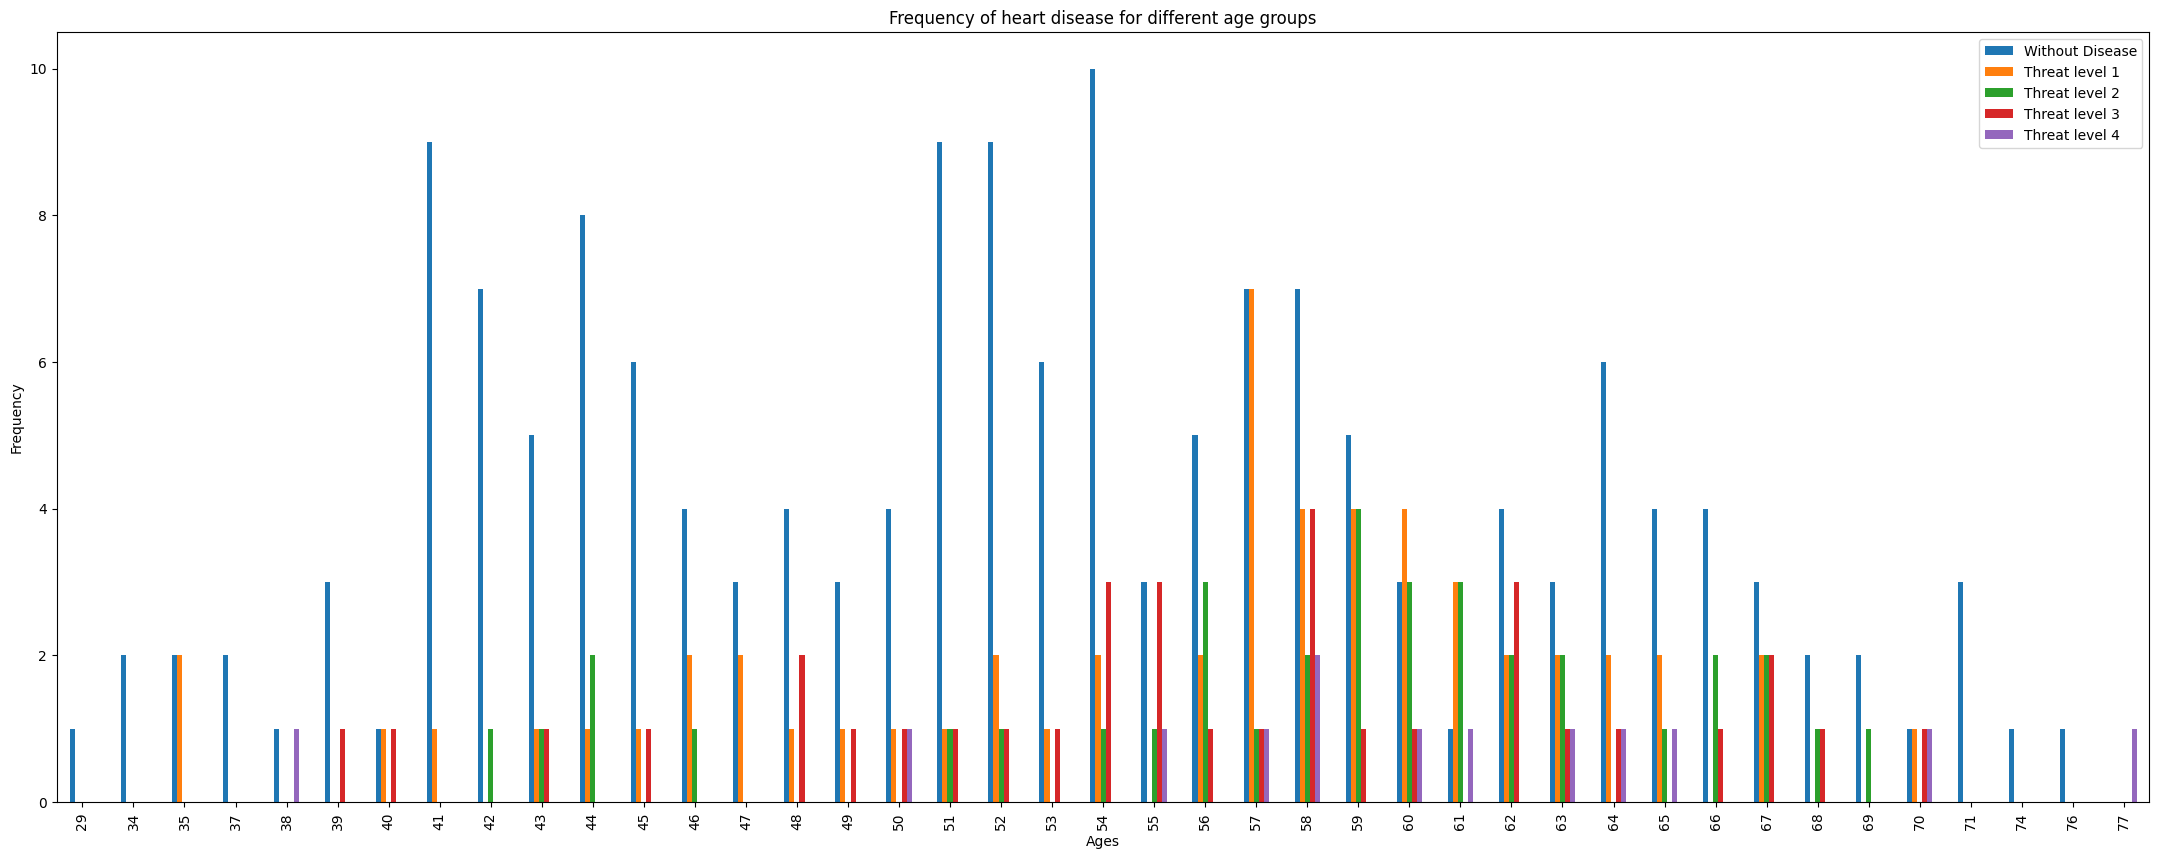

In [19]:
pan.crosstab(data_f.age,data_f.target).plot(kind="bar",figsize=(27,10))
mplot.xlabel('Ages')
mplot.ylabel('Frequency')
mplot.title('Frequency of heart disease for different age groups')
mplot.savefig('FrequencyVsage.png')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.show()

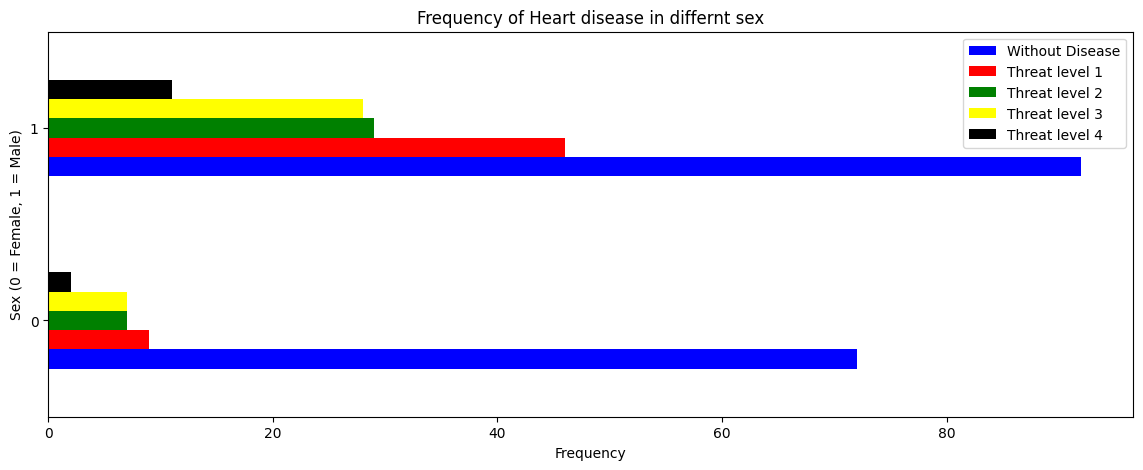

In [26]:
pan.crosstab(data_f.sex,data_f.target).plot(kind="barh",figsize=(14,5),color=['blue','red','green','yellow','black'])
mplot.title('Frequency of Heart disease in differnt sex')
mplot.ylabel('Sex (0 = Female, 1 = Male)')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.xlabel('Frequency')
mplot.show()

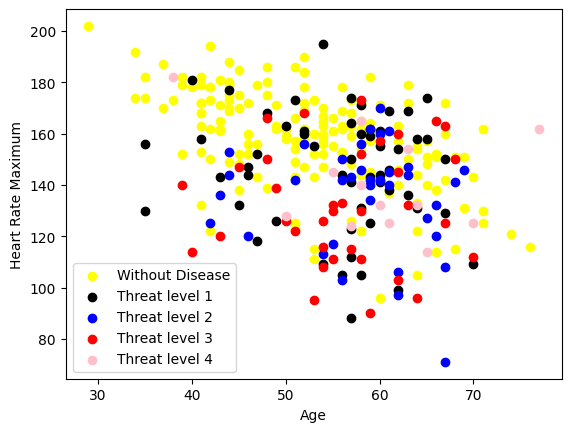

In [21]:
mplot.scatter(x=data_f.age[data_f.target==0], y=data_f.thalach[(data_f.target==0)],c="yellow")
mplot.scatter(x=data_f.age[data_f.target==1], y=data_f.thalach[(data_f.target==1)],c="black")
mplot.scatter(x=data_f.age[data_f.target==2], y=data_f.thalach[(data_f.target==2)],c="blue")
mplot.scatter(x=data_f.age[data_f.target==3], y=data_f.thalach[(data_f.target==3)],c="red")
mplot.scatter(x=data_f.age[data_f.target==4], y=data_f.thalach[(data_f.target==4)],c="pink")
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.xlabel("Age")
mplot.ylabel("Heart Rate Maximum")
mplot.show()

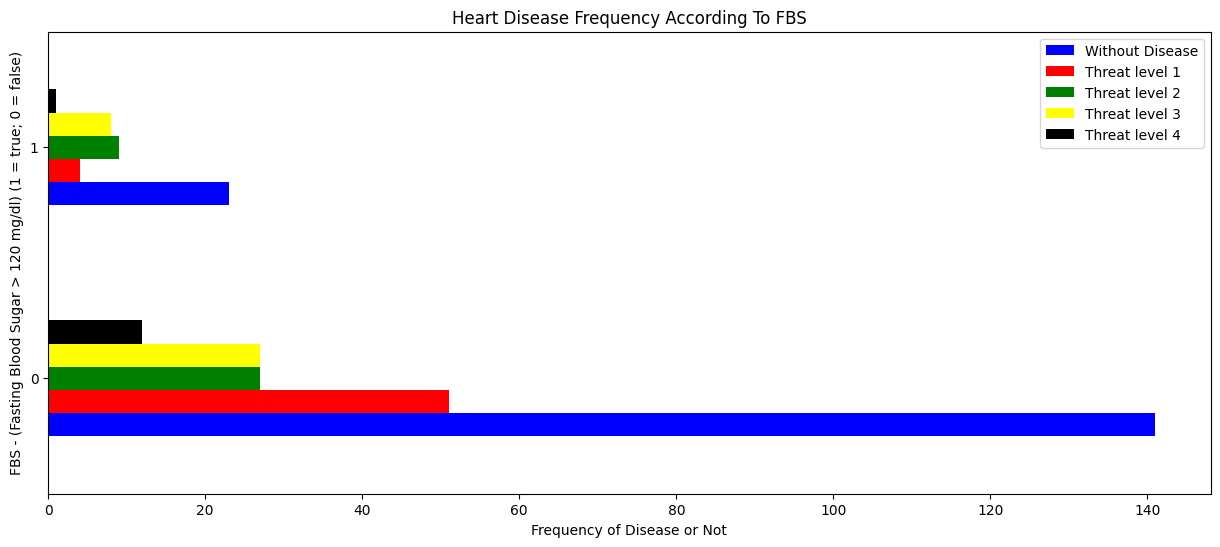

In [27]:
pan.crosstab(data_f.fbs,data_f.target).plot(kind="barh",figsize=(15,6),color=['blue','red','green','yellow','black'])
mplot.title('Heart Disease Frequency According To FBS')
mplot.ylabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.xlabel('Frequency of Disease or Not')
mplot.show()

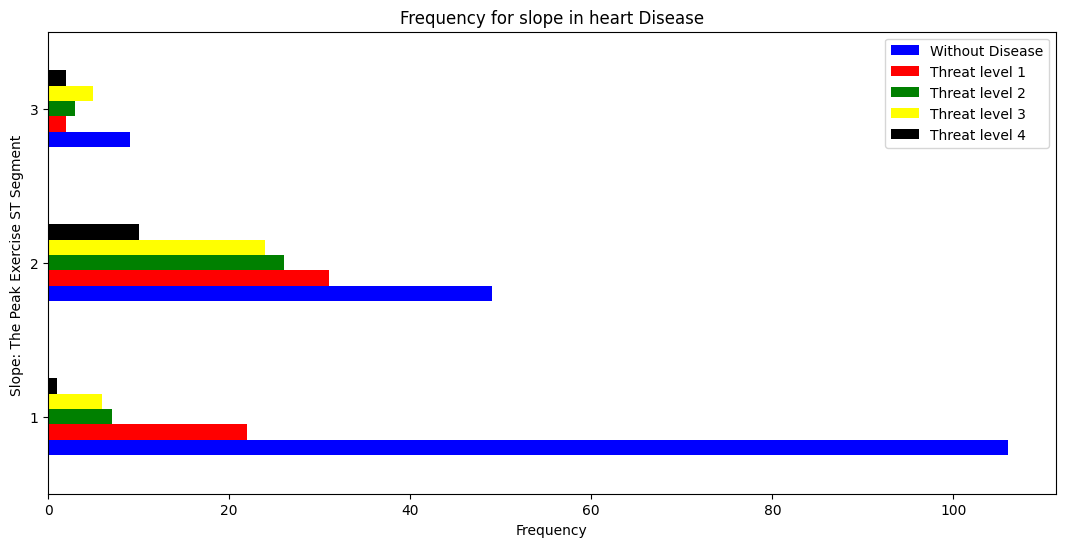

In [28]:
pan.crosstab(data_f.slope,data_f.target).plot(kind="barh",figsize=(13,6),color=['blue','red','green','yellow','black'])
mplot.title('Frequency for slope in heart Disease')
mplot.ylabel('Slope: The Peak Exercise ST Segment ')
mplot.xlabel('Frequency')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.show()

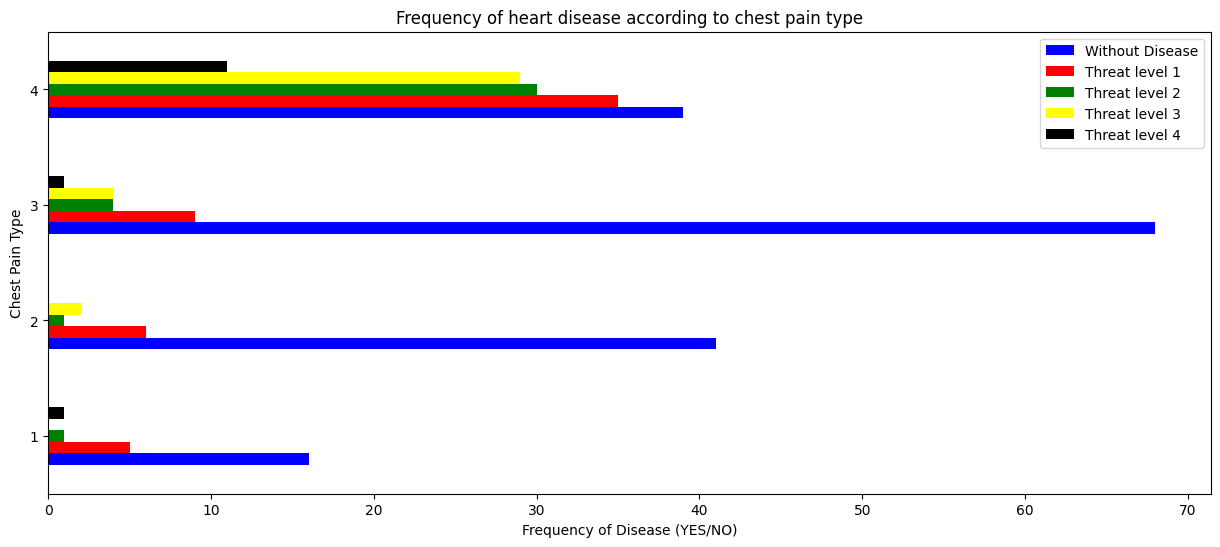

In [29]:
pan.crosstab(data_f.cp,data_f.target).plot(kind="barh",figsize=(15,6),color=['blue','red','green','yellow','black'])
mplot.title('Frequency of heart disease according to chest pain type')
mplot.ylabel('Chest Pain Type')
mplot.xlabel('Frequency of Disease (YES/NO)')
mplot.legend(["Without Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
mplot.show()

In [31]:
data_f['target'] = data_f.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data_f['thal'] = data_f.thal.fillna(data_f.thal.mean())
data_f['ca'] = data_f.ca.fillna(data_f.ca.mean())

In [32]:
data_f.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [33]:
y = data_f['target']
X= data_f.drop(['target'], axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902


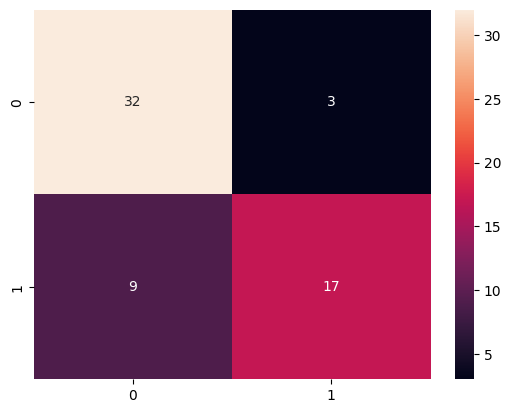

In [35]:
#Support Vector Machine

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

from sklearn import metrics

cf_matrix_test = confusion_matrix(y_test, y_pred)
sbrn.heatmap(cf_matrix_test, annot=True);
#print(metrics.confusion_matrix(y_test, y_pred))
#print(metrics.classification_report(y_test, y_pred))


Accuracy for training set for Logistic Regression = 0.8760330578512396
Accuracy for test set for Logistic Regression = 0.819672131147541


c:\users\hasmit\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


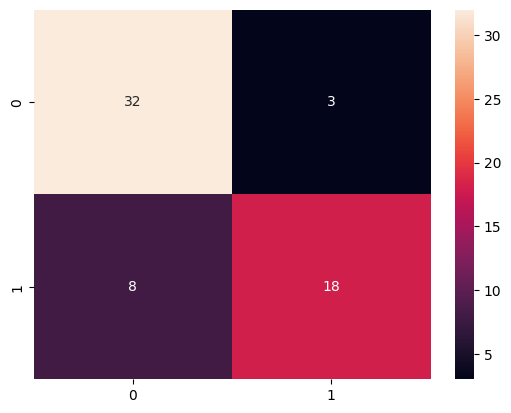

In [37]:
#Logistic Regression

X = data_f.iloc[:, :-1].values
y = data_f.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

cf_matrix_test = confusion_matrix(y_test, y_pred)
sbrn.heatmap(cf_matrix_test, annot=True);


Accuracy for training set for Random Forest = 0.9917355371900827
Accuracy for test set for Random Forest = 0.7377049180327869


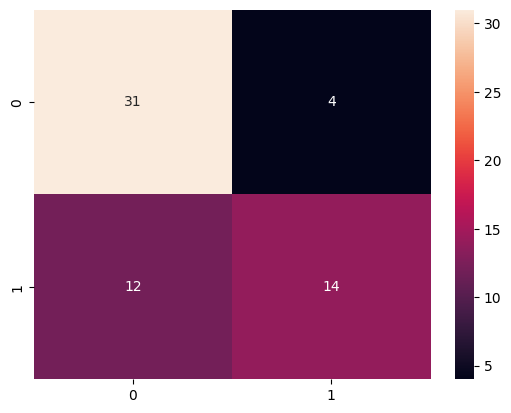

In [39]:
#Random Forest Classifier

X = data_f.iloc[:, :-1].values
y = data_f.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

cf_matrix_test = confusion_matrix(y_test, y_pred)
sbrn.heatmap(cf_matrix_test, annot=True);